#Large Margin Classification

Let's first fit the SV Classifier

In [19]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data[:,(2,3)]    #All rows with petal length and petal width
y = iris.target

X_bin = X[(y==0) | (y==1)]   #Setosa and versicolor only, notice the use of bitwise operator instead of 'or'
y_bin = y[(y==0) | (y==1)]
svc = SVC(kernel="linear", C=np.inf)
svc.fit(X_bin,y_bin)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now let's plot the decision boundary.
Since $\theta_0x_0 + \theta_1x_1 + c = 0$ at the decision boundary, thus:
$x_1 = \frac{-(\theta_0x_0 + c)}{\theta_1}$

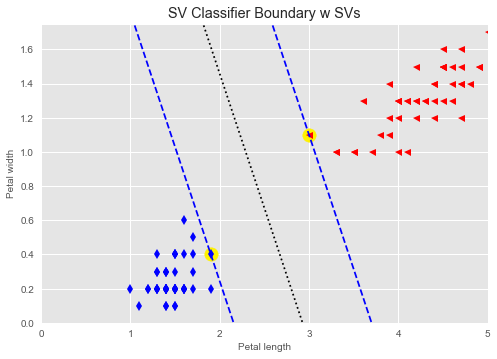

In [46]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
#plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'})

x0 = np.array([0,7.5])
c = svc.intercept_
theta0 = svc.coef_[0][0]
theta1 = svc.coef_[0][1]
dec_boundary = -(theta0*x0 + c)/theta1
    
gap = 1/theta1
sv1line = dec_boundary+gap
sv2line = dec_boundary-gap

SVs = svc.support_vectors_
sv1,sv2 = SVs[0],SVs[1]



plt.plot(X[y==0,0],X[y==0,1],'bd',label = "Iris-Setosa")
plt.plot(X[y==1,0],X[y==1,1],'r<',label = "Iris-Versicolor")
plt.plot(x0,dec_boundary,'k:')
plt.plot(x0,sv1line,'b--')
plt.plot(x0,sv2line,'b--')
plt.scatter(sv1[0],sv1[1],s=180,c='#fff200')
plt.scatter(sv2[0],sv2[1],s = 180, c = '#fff200')
plt.xlabel("Petal length",fontsize = 10)
plt.ylabel("Petal width", fontsize = 10)
plt.title("SV Classifier Boundary w SVs")
plt.axis([0,5,0,1.75])
plt.show()

In [11]:
svc.coef_

array([[1.29411744, 0.82352928]])

[0, 5, 0, 1.75]

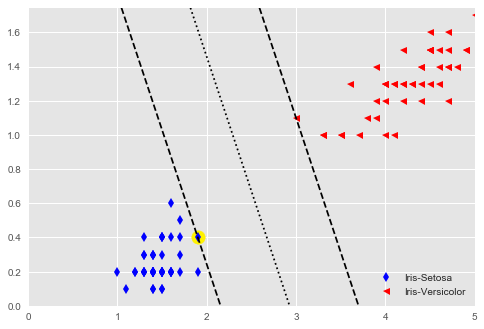

In [47]:
svc = SVC(kernel = 'linear', C = 10**11)
svc.fit(X_bin,y_bin)

x0 = np.array([0,7.5])
c = svc.intercept_
theta0 = svc.coef_[0][0]
theta1 = svc.coef_[0][1]
dec_bound1 = -(theta0*x0 + c)/theta1
gap = 1/theta1
sv1line = dec_boundary+gap
sv2line = dec_boundary-gap
SVs = svc.support_vectors_
sv1,sv2 = SVs[0],SVs[1]

plt.subplot()
plt.plot(X[y==0,0],X[y==0,1],'bd',label = "Iris-Setosa")
plt.plot(X[y==1,0],X[y==1,1],'r<',label = "Iris-Versicolor")
plt.plot(x0, dec_bound1,'k:')
plt.plot(x0, sv1line,'k--')
plt.plot(x0,sv2line,'k--')
plt.scatter(sv1[0],sv1[1],s=180,c='#fff200')
plt.legend()
plt.axis([0,5,0,1.75])


#Soft and Hard Margin Classification

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris.data[:,(2,3)]    #Petal Length and Petal Width
y = (iris.target == 2).astype(np.int8)   #Iris Virginica

#SVM Pipeline
svm_clf = Pipeline([("std_scl",StandardScaler()),
                    ("linsvm",LinearSVC()),
                   ])
svm_clf.fit(X,y)

svm_clf.predict([[1.1 , 0.1]])

array([0], dtype=int8)

In [10]:
scaler = StandardScaler()
linsvm1 = LinearSVC(loss='hinge',C=1,random_state=42)
linsvm100 = LinearSVC(loss = 'hinge',C=100,random_state=42)

svm_clf1 = Pipeline([('scaler',scaler),
                     ('svmlin1',linsvm1),
                     ])
svm_clf100 = Pipeline([('scaler',scaler),
                       ('svmlin100',linsvm100),
                      ])
svm_clf1.fit(X,y)
svm_clf100.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svmlin100', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [11]:
scaler.scale_

array([1.75940407, 0.75969263])

In [12]:
scaler.mean_

array([3.758     , 1.19933333])

In [13]:
linsvm1.decision_function([-scaler.mean_/scaler.scale_])

array([-9.76358332])

In [14]:
linsvm100.decision_function([-scaler.mean_/scaler.scale_])

array([-28.27403284])

In [15]:
linsvm100.coef_[0]/scaler.mean_

array([1.70252531, 4.03113279])

#Non Linear Classification

The Following part shows how a seemingly non-linearly seperable data can be transformed to linearly seperable data with the help of addition of more features (with PolynomialFeatures).

Text(0,60,'$Linear Boundary$')

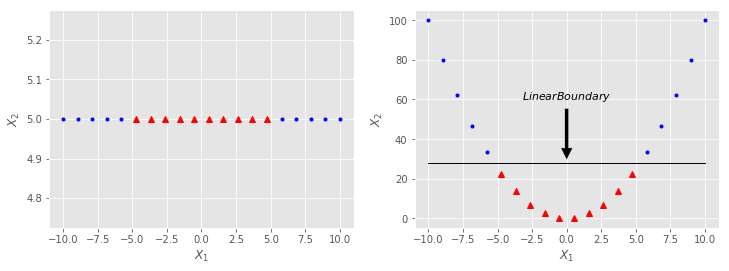

In [22]:
X = np.linspace(-10,10,20).reshape(-1,1)
y = 5*np.ones(shape=(len(X),1)).astype(np.int)
plt.style.use('ggplot')

X2 = X**2
plt.figure(figsize = (12,4))

plt.subplot(121)
plt.plot(X[5:15],y[5:15],'r^')
plt.plot(X[:5],y[:5],'b.')
plt.plot(X[15:],y[15:],'b.')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

plt.subplot(122)
plt.plot(X[5:15],X2[5:15],'r^')
plt.plot(X[:5],X2[:5],'b.')
plt.plot(X[15:],X2[15:],'b.')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.plot([-10,10],[28,28],'k-',linewidth = 1)
plt.annotate(s = r"$Linear Boundary$", xy = (0,28), xytext = (0,60), fontsize = 11, ha="center",arrowprops=dict(facecolor='black', shrink=0.05))

In [23]:
X

array([[-10.        ],
       [ -8.94736842],
       [ -7.89473684],
       [ -6.84210526],
       [ -5.78947368],
       [ -4.73684211],
       [ -3.68421053],
       [ -2.63157895],
       [ -1.57894737],
       [ -0.52631579],
       [  0.52631579],
       [  1.57894737],
       [  2.63157895],
       [  3.68421053],
       [  4.73684211],
       [  5.78947368],
       [  6.84210526],
       [  7.89473684],
       [  8.94736842],
       [ 10.        ]])

In [24]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples=100,noise = 0.16,random_state=42)
X,y = moons[0],moons[1]

def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],'bd')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

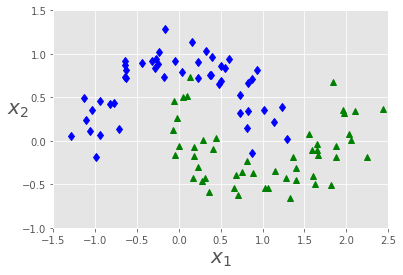

In [25]:
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])

Now we will create a pipeline for using the Polynomial Features.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

poly_svc = Pipeline([("polyfeat",PolynomialFeatures(degree = 3)),
                     ("scaler", StandardScaler()),
                     ("linsvm",LinearSVC(C=10,loss = "hinge",random_state=42))])

poly_svc.fit(X,y)

C:\Users\Animesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polyfeat', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linsvm', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

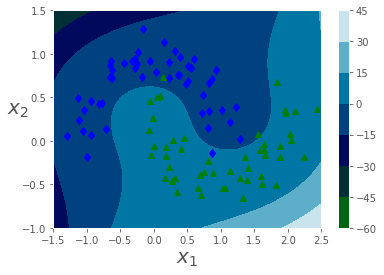

In [49]:
import matplotlib.pyplot as plt
def pred_plot(clf, axes):
    x1 = np.linspace(axes[0],axes[1],100)
    x2 = np.linspace(axes[2],axes[3],100)
    X1,X2 = np.meshgrid(x1,x2)
    X = np.c_[X1.ravel(),X2.ravel()]
    probs = clf.predict(X).reshape(X1.shape)
    decision = clf.decision_function(X).reshape(X1.shape)
    plt.contourf(X1,X2,probs,cmap = plt.cm.gnuplot)
    plt.contourf(X1,X2,decision,cmap = plt.cm.ocean)
    plt.colorbar(mappable=plt.contourf(X1,X2,decision,cmap = plt.cm.ocean))
    
plot_dataset(X=X,y=y,axes = [-1.5, 2.5, -1, 1.5])
pred_plot(axes = [-1.5, 2.5, -1, 1.5],clf = poly_svc)

#Kernels

##Polynomial Kernel

In [39]:
from sklearn.svm import SVC
poly315 = Pipeline([("scaler",StandardScaler()),
                    ("svc",SVC(kernel = "poly", degree=3,coef0=1,C=5))])
poly101005 = Pipeline([("scaler",StandardScaler()),
                       ("svc",SVC(kernel = "poly", degree = 10, coef0=100, C=5))])
poly315.fit(X,y)
poly101005.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Text(0.5,1,'deg=10, c0=100, C=5')

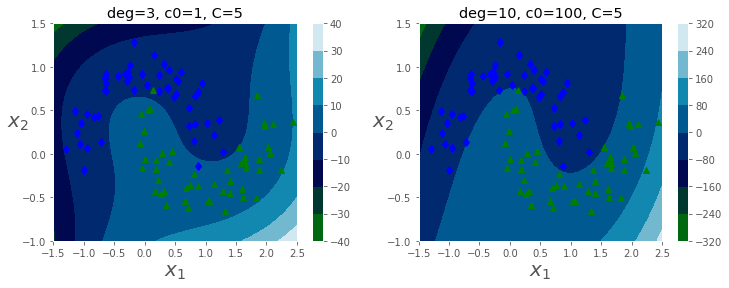

In [40]:
plt.figure( figsize = (12,4))
plt.subplot(121)
plot_dataset(X=X,y=y,axes = [-1.5, 2.5, -1, 1.5])
pred_plot(clf=poly315,axes =[-1.5, 2.5, -1, 1.5])
plt.title("deg=3, c0=1, C=5")
plt.subplot(122)
plot_dataset(X=X,y=y,axes = [-1.5, 2.5, -1, 1.5])
pred_plot(clf=poly101005,axes =[-1.5, 2.5, -1, 1.5])
plt.title("deg=10, c0=100, C=5")

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [42]:
def gaussian_rbf(x,landmark,gamma):
    return np.exp(-gamma*np.linalg.norm(x-landmark, axis = 1)**2)


#Similarity Features

It's an another technique to handle nonlinear data by adding features using similarity features.

Similarity function gives the measure of how much a particular value resembles a particular landmark

Text(0,0.5,'$x_3$')

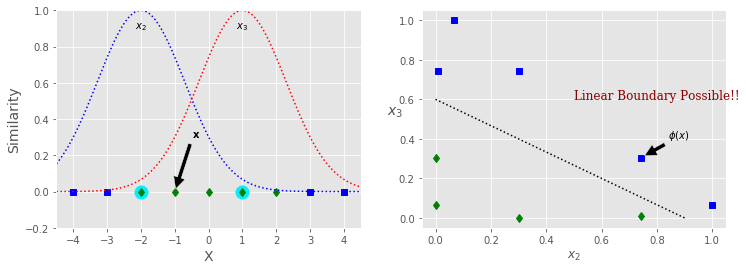

In [43]:
x = np.linspace(-4.5,4.5,200).reshape(-1,1)
x2 = gaussian_rbf(gamma=0.3,landmark=-2,x=x)
x3 = gaussian_rbf(gamma=0.3,landmark=1,x=x)

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

Xrbf = np.c_[gaussian_rbf(gamma=0.3,landmark=-2,x=X1D),gaussian_rbf(gamma=0.3,landmark=1,x=X1D)]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(X1D[:,0][y==0],np.zeros(4),'bs')
plt.plot(X1D[:,0][y==1],np.zeros(5),'gd')
plt.scatter([-2,1],[0,0],s=180,c='#00eeff')
plt.plot(x,x2,'b:')
plt.plot(x,x3,'r:')
plt.xlabel("X",fontsize = 14)
plt.ylabel(r"Similarity",fontsize = 14)
plt.annotate(s = r"$\mathbf{x}$", xy = (-1,0), xytext = (-0.5,0.3), arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(s=r"$x_2$",x=-2,y=0.9,ha = "center")
plt.text(s=r"$x_3$",x=1,y=0.9,ha = "center")
plt.axis([-4.5,4.5,-0.2,1])

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

#X_2 vs X_3
plt.subplot(122)
plt.plot(Xrbf[:,0][y==0],Xrbf[:,1][y==0],'gd')
plt.plot(Xrbf[:,0][y==1],Xrbf[:,1][y==1],'bs')
plt.plot([0,0.9],[0.6,-0.0],'k:')
plt.annotate(s = r"$\phi(x)$",xy = (Xrbf[3,0]+0.01,Xrbf[3,1]+0.01),xytext = (Xrbf[3,0]+0.1,Xrbf[3,1]+0.1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(s="Linear Boundary Possible!!",x=0.5,y=0.6,fontdict=font)
plt.xlabel(r"$x_2$")
plt.ylabel(r"$x_3$",rotation = 0, fontsize = 14)





In [44]:
x2

array([1.53354967e-01, 1.64018767e-01, 1.75208937e-01, 1.86933003e-01,
       1.99196969e-01, 2.12005186e-01, 2.25360221e-01, 2.39262728e-01,
       2.53711327e-01, 2.68702482e-01, 2.84230393e-01, 3.00286888e-01,
       3.16861328e-01, 3.33940522e-01, 3.51508654e-01, 3.69547219e-01,
       3.88034973e-01, 4.06947905e-01, 4.26259214e-01, 4.45939311e-01,
       4.65955833e-01, 4.86273679e-01, 5.06855063e-01, 5.27659583e-01,
       5.48644320e-01, 5.69763941e-01, 5.90970835e-01, 6.12215263e-01,
       6.33445525e-01, 6.54608150e-01, 6.75648099e-01, 6.96508990e-01,
       7.17133332e-01, 7.37462781e-01, 7.57438404e-01, 7.77000951e-01,
       7.96091150e-01, 8.14649991e-01, 8.32619032e-01, 8.49940699e-01,
       8.66558595e-01, 8.82417795e-01, 8.97465158e-01, 9.11649614e-01,
       9.24922455e-01, 9.37237614e-01, 9.48551930e-01, 9.58825399e-01,
       9.68021411e-01, 9.76106967e-01, 9.83052874e-01, 9.88833925e-01,
       9.93429047e-01, 9.96821431e-01, 9.98998633e-01, 9.99952654e-01,
      

We will now implement Gaussian RBF Kernel with the help of sklearn's SVM

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
grbf_svm = Pipeline([("scaler",StandardScaler()),
                     ("svc",SVC(kernel="rbf",gamma = 5,C = 0.001))
                    ])


Loading the make moons data again

In [46]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples=100,noise = 0.16,random_state=42)
X,y = moons[0],moons[1]
grbf_svm.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

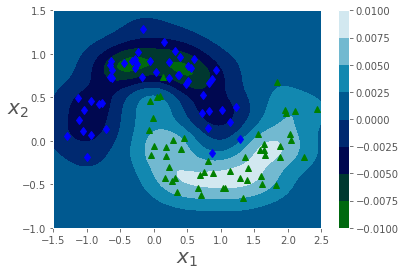

In [47]:
plot_dataset(X=X,y=y,axes=[-1.5, 2.5, -1, 1.5])
pred_plot(axes=[-1.5, 2.5, -1, 1.5],clf=grbf_svm)

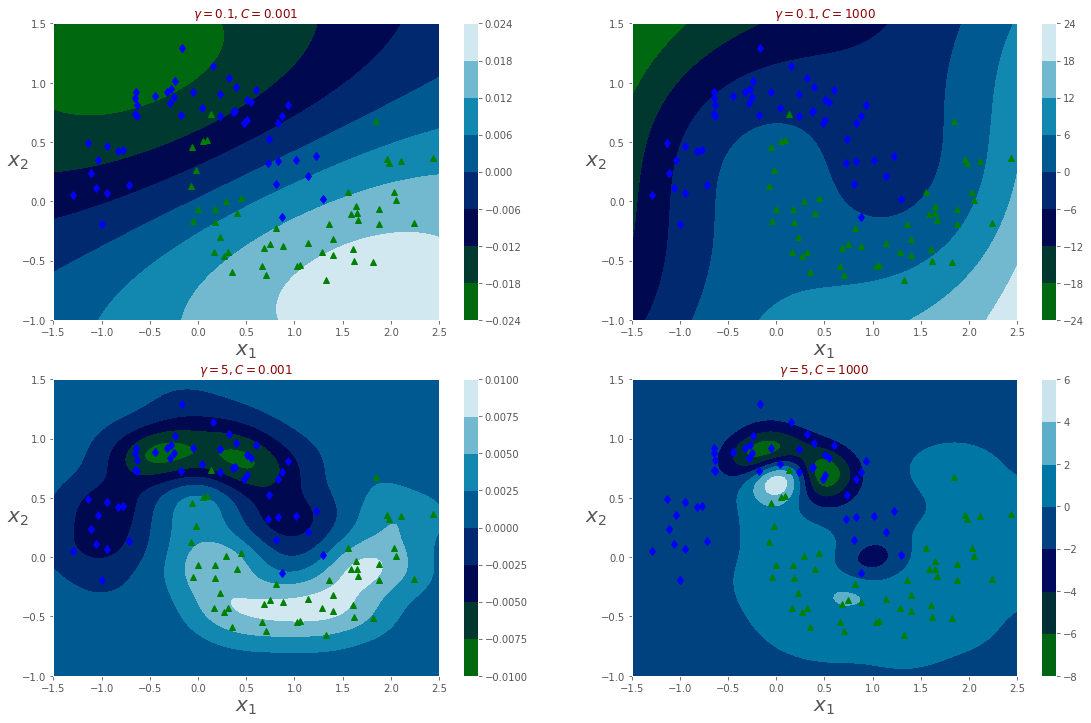

In [72]:
gamma1,gamma2 = 0.1,5
C1,C2 = 0.001,1000

hparams = (gamma1,C1),(gamma1,C2),(gamma2,C1),(gamma2,C2)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

plt.figure(figsize = (19,12))
for ind in range(len(hparams)):
    svc_rbf = Pipeline([("scaler",StandardScaler()),
                        ("svc", SVC(kernel = "rbf", C=hparams[ind][1], gamma = hparams[ind][0]))
                       ])
    svc_rbf.fit(X,y) 
    
    plt.subplot(221 + ind)
    plot_dataset(X=X,axes=[-1.5, 2.5, -1, 1.5],y=y)
    pred_plot(axes=[-1.5, 2.5, -1, 1.5],clf=svc_rbf)
    plt.title(r"$\gamma = {gamma}, C = {C}$".format(gamma = hparams[ind][0], C = hparams[ind][1]), fontdict = font)
    

In [63]:
hparams[0][0]

0.1

#SVM Regression

Creating Linear Data

In [2]:
import numpy as np
X = np.random.rand(100,1)
y = X*2+3 + np.random.randn(100,1)

Let's visualize this data 

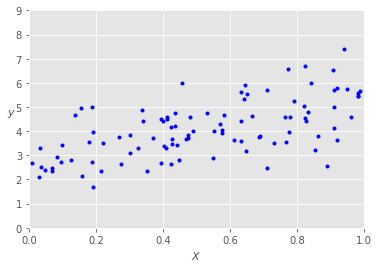

In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(X,y,'b.')
plt.axis([0,1,0,9])
plt.xlabel("$X$",fontsize = 11)
plt.ylabel("$y$",fontsize = 11, rotation = 0)
plt.show()

In [5]:
from sklearn.svm import LinearSVR

svr_15 = LinearSVR(epsilon = 1.5, random_state = 42)
svr_05 = LinearSVR(epsilon = 0.5, random_state = 42)

svr_15.fit(X,y.ravel())
svr_05.fit(X,y.ravel())

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [24]:
y_pred = svr_15.predict(X=X)
someone = np.abs(y-y_pred) >= svr_15.epsilon
np.argwhere(someone)

array([[ 1,  0],
       [ 1,  1],
       [ 1,  3],
       ...,
       [99, 94],
       [99, 95],
       [99, 96]], dtype=int64)

In [50]:
def sup_vec_loc(svr,X,y):
    y_pred = svr.predict(X).reshape(-1,1)
    bad_val = np.abs(y-y_pred) >= svr.epsilon
    return np.argwhere(bad_val)

def plot_svr_street(svr,X,y,):
    x_axis = np.linspace(-1,1,100).reshape(100,1)
    #x_axis = np.linspace(0,1,100).reshape(100,1)   commented because of use of non-linear regression in the next section
    y_pred = svr.predict(x_axis)
    plt.plot(X,y,'bd')
    plt.plot(x_axis, y_pred, 'r-')
    plt.plot(x_axis, y_pred+svr.epsilon, 'k--')
    plt.plot(x_axis, y_pred-svr.epsilon, 'k--')
    plt.scatter(X[sup_vec_loc(svr,X,y)[:,0]], y[sup_vec_loc(svr,X,y)[:,0]], s = 180, c = "violet")
    plt.xlabel(r"$X$",fontsize = 13)
    plt.ylabel(r"$y$",fontsize = 13,rotation = 0)
    plt.title(r"$\epsilon = {}$".format(svr.epsilon), fontsize = 18)

Please Note that np.argwhere in this case will return the column number 0, which was getting picked up by plt.scatter, that's why I used $0^{th}$ column explicitly in plot_svr_street function 

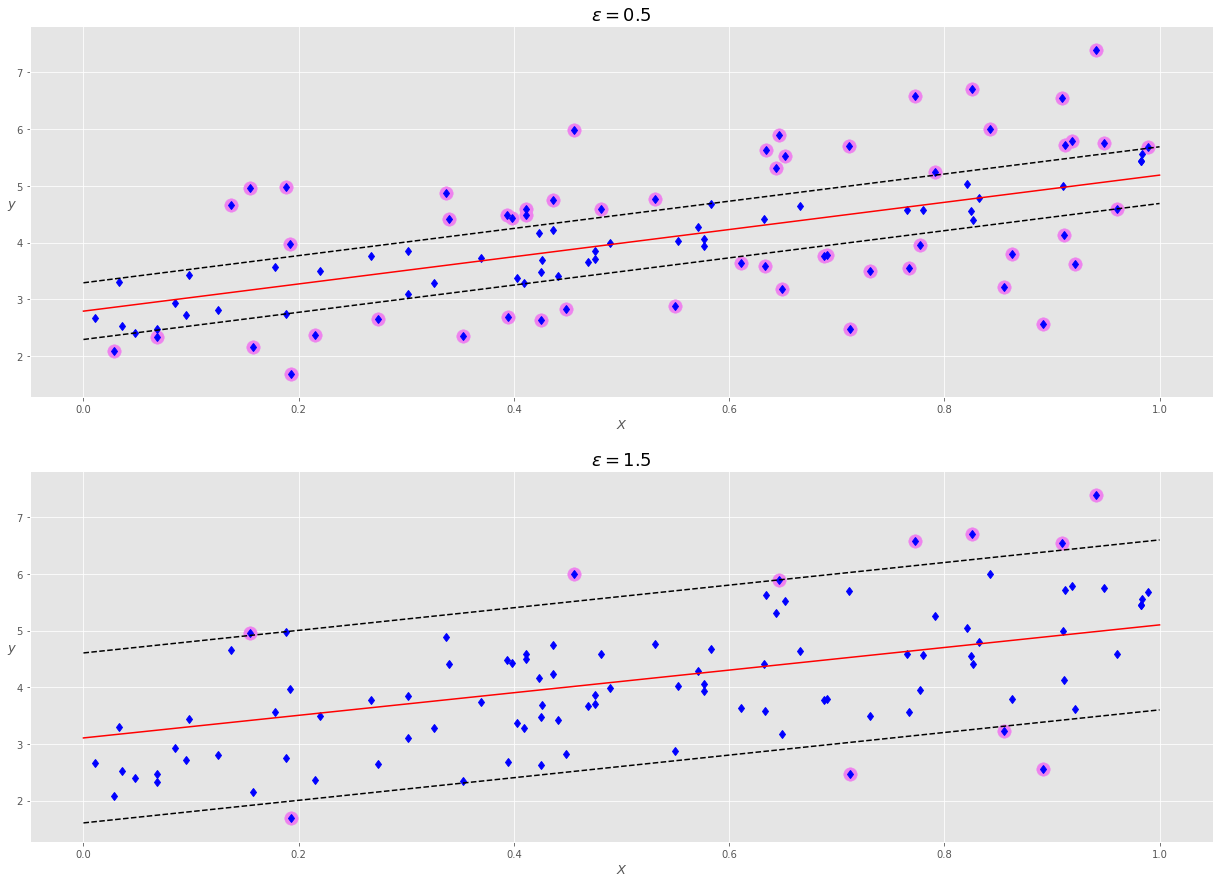

In [154]:
plt.figure(figsize = (15*np.sqrt(2),15))
plt.subplot(211)
plot_svr_street(svr_05,X,y)
plt.subplot(212)
plot_svr_street(svr_15,X,y)

Notice how the 

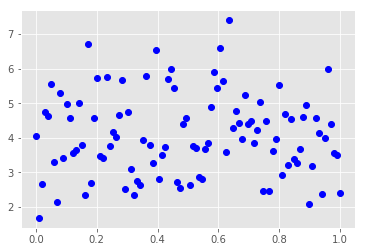

In [167]:
x_axis = np.linspace(0,1,100).reshape(100,1)
plt.plot(x_axis,y,'bo')

In [168]:
svr_15.predict(x_axis)

array([3.10582509, 3.125979  , 3.14613292, 3.16628683, 3.18644074,
       3.20659465, 3.22674857, 3.24690248, 3.26705639, 3.2872103 ,
       3.30736421, 3.32751813, 3.34767204, 3.36782595, 3.38797986,
       3.40813378, 3.42828769, 3.4484416 , 3.46859551, 3.48874943,
       3.50890334, 3.52905725, 3.54921116, 3.56936508, 3.58951899,
       3.6096729 , 3.62982681, 3.64998072, 3.67013464, 3.69028855,
       3.71044246, 3.73059637, 3.75075029, 3.7709042 , 3.79105811,
       3.81121202, 3.83136594, 3.85151985, 3.87167376, 3.89182767,
       3.91198159, 3.9321355 , 3.95228941, 3.97244332, 3.99259724,
       4.01275115, 4.03290506, 4.05305897, 4.07321288, 4.0933668 ,
       4.11352071, 4.13367462, 4.15382853, 4.17398245, 4.19413636,
       4.21429027, 4.23444418, 4.2545981 , 4.27475201, 4.29490592,
       4.31505983, 4.33521375, 4.35536766, 4.37552157, 4.39567548,
       4.41582939, 4.43598331, 4.45613722, 4.47629113, 4.49644504,
       4.51659896, 4.53675287, 4.55690678, 4.57706069, 4.59721

In [169]:
svr_05.predict(x_axis)


array([2.78949461, 2.81372852, 2.83796244, 2.86219635, 2.88643027,
       2.91066419, 2.9348981 , 2.95913202, 2.98336593, 3.00759985,
       3.03183376, 3.05606768, 3.08030159, 3.10453551, 3.12876943,
       3.15300334, 3.17723726, 3.20147117, 3.22570509, 3.249939  ,
       3.27417292, 3.29840684, 3.32264075, 3.34687467, 3.37110858,
       3.3953425 , 3.41957641, 3.44381033, 3.46804425, 3.49227816,
       3.51651208, 3.54074599, 3.56497991, 3.58921382, 3.61344774,
       3.63768166, 3.66191557, 3.68614949, 3.7103834 , 3.73461732,
       3.75885123, 3.78308515, 3.80731907, 3.83155298, 3.8557869 ,
       3.88002081, 3.90425473, 3.92848864, 3.95272256, 3.97695647,
       4.00119039, 4.02542431, 4.04965822, 4.07389214, 4.09812605,
       4.12235997, 4.14659388, 4.1708278 , 4.19506172, 4.21929563,
       4.24352955, 4.26776346, 4.29199738, 4.31623129, 4.34046521,
       4.36469913, 4.38893304, 4.41316696, 4.43740087, 4.46163479,
       4.4858687 , 4.51010262, 4.53433654, 4.55857045, 4.58280

#Non Linear SV Regression

Let's first create some non-linear data

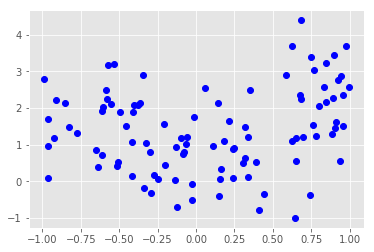

In [142]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
X = 2*np.random.rand(100,1)-1

y = (np.sqrt(2)*X**2 + np.sqrt(1.2) +np.random.randn(100,1))
plt.plot(X,y,'bo')

Fitting the models now

In [143]:
from sklearn.svm import SVR

svr1 = SVR(kernel = 'poly', degree = 2, C = 1, epsilon = 2, gamma = 'auto')
svr100 = SVR(kernel = 'poly', degree = 2, C = 1000, epsilon = 2, gamma = 'auto')

svr1.fit(X,y.ravel())
svr100.fit(X,y.ravel())

SVR(C=1000, cache_size=200, coef0=0.0, degree=2, epsilon=2, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0.5,1,'degree = 2, C = 1000, $\\epsilon = $2')

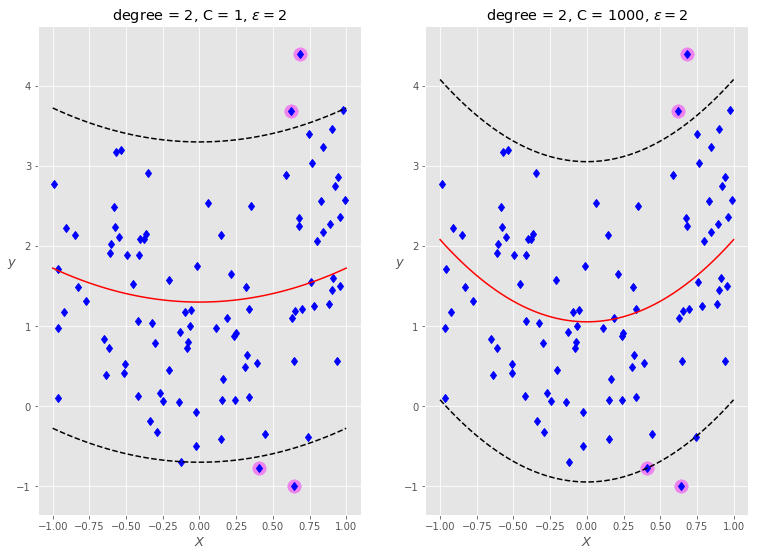

In [144]:
plt.figure(figsize = (9*np.sqrt(2),9))
plt.subplot(121)
plot_svr_street(svr=svr1,X=X,y=y)
plt.title(r"degree = {deg}, C = {c}, $\epsilon = ${eps}".format(deg = svr1.degree, c = svr1.C, eps = svr1.epsilon))

plt.subplot(122)
plot_svr_street(svr=svr100, X=X, y=y)
plt.title(r"degree = {deg}, C = {c}, $\epsilon = ${eps}".format(deg = svr100.degree, c = svr100.C, eps = svr100.epsilon))

#Plotting the Decision Function

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
plt.style.use('ggplot')
iris = load_iris()
X = iris.data[:,(2,3)] #Petal length andpetal width
y = (iris.target == 2).astype(np.int8) #Iris Virginica

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C = 1, loss = "hinge", random_state = 42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])
scaled_svm_clf.fit(X,y)


#To get back the unscaled coefficients

b2 = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w2 = svm_clf.coef_[0] / scaler.scale_

svm_clf.intercept_ = np.array([b2])
svm_clf.coef_ = np.array([w2])

The code below is my first 3D plot in Matplotlib, thus ofcourse, a lot of code seems similar to ageron's one. But again, that's not the point.
I made sure I understood each line that I was copying, the same can be seen from the comments.
Also, I didn't just blatantly copied it, I understood it, from the ageron's NB, then wrote it myself.

In [21]:
from mpl_toolkits.mplot3d import Axes3D
def plot3d_dec_func(ax, w, b, x1_lim = [4,6], x2_lim = [0.8,2.8]):
    #1. Ensuring that we use data that is only present in the x1_lim. (yes, both petal length and petal width are masked by petal length's limits)
    X_in_limits_mask = (X[:,0] > x1_lim[0]) & (X[:,0] < x1_lim[1])
    X_cropped = X[X_in_limits_mask]
    y_cropped = y[X_in_limits_mask]
    #\1
    
    #2. Creating the axes data
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
        #2.1 : To create a positional grid for the above data, we'll use np.meshgrid
    x_1, x_2 = np.meshgrid(x1s,x2s)
        #2.2 : Finally, we'll add these two matrices in a different array, with these being it's columns
    xs = np.c_[x_1.ravel(),x_2.ravel()]
    #\2
    
    #3. Calculating the Decision Function Values
    dec_func = (xs.dot(w) + b).reshape(x_1.shape)
        #3.1 : The dec_func is reshaped to the meshgrid's shape in order to make it cooperate with the plotting process of the graph.
    #\3
    
    #4. Defining the values of boundaries and margins
        #4.1 : Note that these values are for the decision boundary, which are found when decision function shows zero value.
    boundary_x2s = (-x1s*(w[0]))/w[1] - (b)/w[1]
    margin_x2s_1 = (-x1s*(w[0]))/w[1] - (b+1)/w[1]
    margin_x2s_2 = (-x1s*(w[0]))/w[1] - (b-1)/w[1]
    #\4
    
    
    #5. Plotting the surface where decision function is zero
    ax.plot_surface(x_1, x_2, np.zeros_like(x_1), color = 'blue',alpha = 0.2)
    #\5
    
    
    #6. Plotting the samples
    ax.plot(X_cropped[:,0][y_cropped == 1],X_cropped[:,1][y_cropped==1],0,'gd', label = "Iris-Virginica")
    ax.plot(X_cropped[:,0][y_cropped == 0],X_cropped[:,1][y_cropped==0],0,'bs', label = "Iris-Versicolor")
    #\6
    
    #7. Plotting the Decision Function's surface
    ax.plot_wireframe(x_1,x_2,dec_func, color = 'c')
    #\7
    
    #8. Plotting the decision boundary and margins
    ax.plot(x1s,boundary_x2s,0,'k-', alpha = 0.5)
    ax.plot(x1s,margin_x2s_1,0,'k--', alpha = 0.5)
    ax.plot(x1s,margin_x2s_2,0,'k--', alpha = 0.5)
    #\8
    
    #9. Some last stuff
    ax.set_xlabel("Petal Length",fontsize = 11)
    ax.set_ylabel("Petal Width",fontsize = 11)
    ax.set_zlabel(r"Decision Function || $\mathbf{h} = \mathbf{w}^T + \mathbf{b}$",fontsize = 11)
    ax.text(5,2,4,r"Decision Function $h$")
    
    #\9

In [22]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
svm_clf.coef_ #This is w

array([[0.92832758, 3.14321201]])

In [24]:
svm_clf.intercept_ #This is b

array([[-9.76358332]])

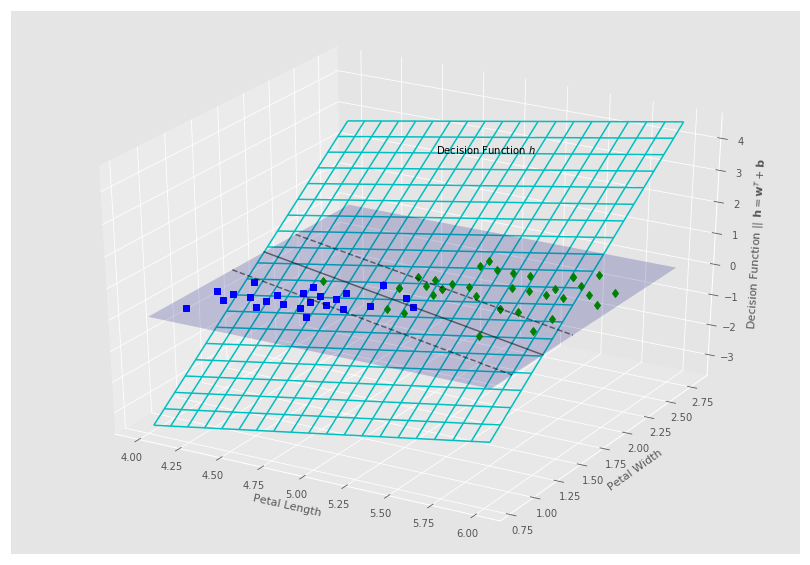

In [25]:
fig = plt.figure(figsize = (10*np.sqrt(2),10))
axes = fig.add_subplot(111, projection = '3d')

plot3d_dec_func(ax=axes,b=svm_clf.intercept_[0],w=svm_clf.coef_[0])

#Large weight vector results in a smaller margin

In [81]:
from matplotlib import rc
rc('text', usetex=False)
def plot_2d_dec_func(w,b,x1_lim = [-3,3]):
    x1s = np.linspace(x1_lim[0],x1_lim[1],200)
    y = w*x1s + b
    mgn = (1-b)/w
    
    plt.plot(x1s,y,'k-')
    plt.plot([mgn,mgn],[0,1],'k--')
    plt.plot([-mgn,-mgn],[0,-1],'k--')   
    plt.axhline(y=0,c="b")
    plt.axvline(x=0,c="b")
    plt.xlabel("X",fontsize = 13)   
    plt.ylabel("y",fontsize = 13)
    plt.plot([-mgn,mgn],[0,0],'k-',linewidth = 4)
    plt.annotate(s = r"Margin",xy = (0.5,0),xytext = (1,-1), arrowprops = dict(arrowstyle = 'fancy'))
    plt.axis([-3,3,-3,3])
    plt.title(r"$||w|| = {}$".format(w))

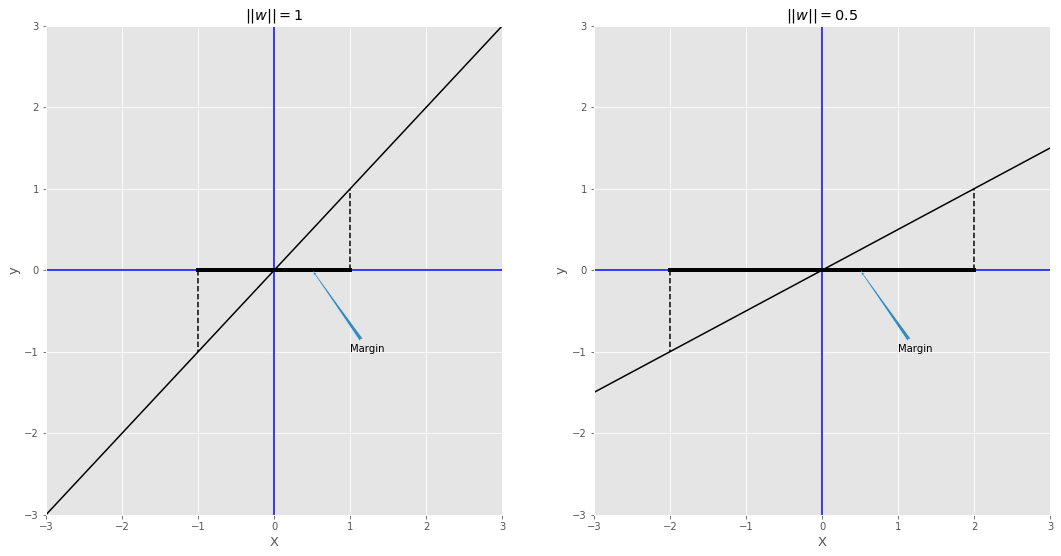

In [82]:
plt.figure(figsize = (18,9))
plt.subplot(121)
plot_2d_dec_func(w=1,b=0.0)
plt.subplot(122)
plot_2d_dec_func(w=0.5,b=0.0)

Since the $y$(i.e. Decision function's value) will remain at $1$, thus total length of the margin is given by $\frac{2}{tan(\theta)}$ where $tan(\theta)$ is another word for the norm $||w||$.

#Exercise Solutions

##1.> Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

We'll use the iris dataset

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,(2,3)] # Petal length and petal width
y = iris.target

Training LinearSVC on this dataset

In [14]:
import numpy as np
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
X = X[(y==0)|(y==1)]   #For Iris setosa or Iris versicolor
y = y[(y==0)|(y==1)]

C = 5
alpha = 1/(C*len(X)/2)

lin_svc = LinearSVC(loss = 'hinge',C=C,random_state = 42)
svc = SVC(kernel = 'linear', C = C)
sgd_clf = SGDClassifier(alpha = alpha, learning_rate='constant', tol = -np.inf, max_iter=100000, random_state=42, eta0= 0.001)


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_svc.fit(X_scaled,y)
svc.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)


SGDClassifier(alpha=0.004, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='hinge',
       max_iter=100000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
print("LinearSVC: ", lin_svc.intercept_, lin_svc.coef_)
print("SVC: ", svc.intercept_, svc.coef_)
print("SGDClassifer: alpha({})".format(sgd_clf.alpha),sgd_clf.intercept_, sgd_clf.coef_ )

LinearSVC:  [0.28474027] [[1.0536456  1.09903032]]
SVC:  [0.31896852] [[1.1203284  1.02625193]]
SGDClassifer: alpha(0.004) [0.32] [[1.11999187 1.02648301]]


Now we need to calculate the slope and bias terms of the individual estimator

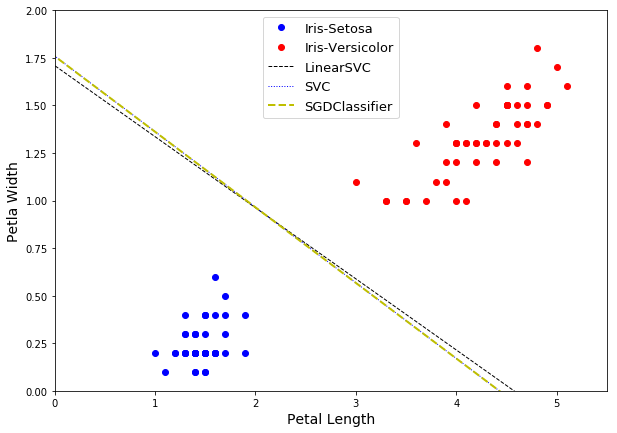

##Question 2

Q2. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach? 

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache = True, version = 1 )

In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist.data
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

Shuffling the indices might be a good idea

In [4]:
import numpy as np
np.random.seed(42)
shuffled_indices = np.random.permutation(60000)
X_train_shfld = X_train[shuffled_indices]
y_train_shfld = y_train[shuffled_indices]

In [5]:
shuffled_indices

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [21]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(multi_class='ovr',random_state=42)
lin_svc.fit(X_train_shfld,y_train_shfld)

from sklearn.metrics import accuracy_score
y_pred = lin_svc.predict(X_train)
accuracy_score(y_train,y_pred)

C:\Users\Animesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8827333333333334

We Might wanna scale the input using StandardScaler now.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_shfld_scld = scaler.fit_transform(X_train_shfld)
X_test_scld = scaler.fit_transform(X_test)

In [31]:
lin_svc.fit(X_train_shfld_scld,y_train_shfld)
y_pred = lin_svc.predict(X_train_shfld_scld)
accuracy_score(y_train_shfld,y_pred)

C:\Users\Animesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9227666666666666

NICE!!!

What we will do now is that we will use SVC with linear kernel and use Randomized search CV on a small validation set of size 1000-2000
and then fit that best model on whole training set.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train_shfld_scld,y_train_shfld)
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_train_shfld_scld[:10000])
accuracy_score(y_train_shfld[:10000],y_pred)


0.9844

NICE!! again

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, reciprocal
hyperparams = {'gamma':reciprocal(0.001,1),'C':uniform(1,10)}
rndm_srch_cv = RandomizedSearchCV(svc,hyperparams,n_iter = 11,cv = 3, verbose = 2)
rndm_srch_cv.fit(X_train_shfld_scld[:1000],y_train_shfld[:1000])

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] C=3.5988934774124326, gamma=0.0018613951980788932 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=3.5988934774124326, gamma=0.0018613951980788932, total=   0.3s
[CV] C=3.5988934774124326, gamma=0.0018613951980788932 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  C=3.5988934774124326, gamma=0.0018613951980788932, total=   0.3s
[CV] C=3.5988934774124326, gamma=0.0018613951980788932 ...............
[CV]  C=3.5988934774124326, gamma=0.0018613951980788932, total=   0.3s
[CV] C=3.055855399572819, gamma=0.5507723543654672 ...................
[CV] .... C=3.055855399572819, gamma=0.5507723543654672, total=   0.3s
[CV] C=3.055855399572819, gamma=0.5507723543654672 ...................
[CV] .... C=3.055855399572819, gamma=0.5507723543654672, total=   0.3s
[CV] C=3.055855399572819, gamma=0.5507723543654672 ...................
[CV] .... C=3.055855399572819, gamma=0.5507723543654672, total=   0.3s
[CV] C=1.107005900704854, gamma=0.002514109300601335 .................
[CV] .. C=1.107005900704854, gamma=0.002514109300601335, total=   0.3s
[CV] C=1.107005900704854, gamma=0.002514109300601335 .................
[CV] .. C=1.107005900704854, gamma=0.002514109300601335, total=   0.3s
[CV] C=1.107005900704854, gamma=0.002514109300601335 .................
[CV] .

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   23.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=11, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A507FAE9E8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A507FAEB38>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [31]:
rndm_srch_cv.best_estimator_.fit(X_train_shfld_scld,y_train_shfld)

SVC(C=8.852316058423087, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0018613951980788932,
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
rndm_srch_cv.best_estimator_.C = 8.852316058423087
rndm_srch_cv.best_estimator_.kernel = 'rbf'

In [32]:
y_pred = rndm_srch_cv.best_estimator_.predict(X_train_shfld_scld)

In [33]:
accuracy_score(y_train_shfld,y_pred)

0.9997166666666667

GOOD....But this is on training set itself.
Let's test this model on test set

In [34]:
y_pred = rndm_srch_cv.best_estimator_.predict(X_test_scld)
accuracy_score(y_test,y_pred)

0.9704

In [22]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [26]:
import chart_studio.plotly as py
import plotly.graph_objects as go

go.Scatter(x=[1,2,3,4,5], y= [10,11,12,13,14])


Scatter({
    'x': [1, 2, 3, 4, 5], 'y': [10, 11, 12, 13, 14]
})